<a href="https://colab.research.google.com/github/ReyanPatel/PandasStrokeAnalysis/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **READING THE DATA**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
stroke_data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
stroke_data.head(15)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
len(stroke_data.axes[1])

12

# **DIVIDING THE DATA INTO MALE AND FEMALE**:

In [ ]:
df_male = stroke_data[stroke_data["gender"] == "Male"]
df_female = stroke_data[stroke_data["gender"] == "Female"]

In [ ]:
df_male

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5097,64520,Male,68.0,0,0,Yes,Self-employed,Urban,91.68,40.8,Unknown,0
5098,579,Male,9.0,0,0,No,children,Urban,71.88,17.5,Unknown,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0


In [ ]:
df_female

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


# **DIVIDING THE DATA INTO AGE GROUPS (BOTH MALE AND FEMALE)**

In [ ]:
def check_pos(data):

    bins = [0.08, 10, 20, 30, 40, 50, 60, 70, 83]
    labels = ['0.08-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-82']

    data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

    stroke_rates = data.groupby('age_group')['stroke'].mean()

    colors = ['#28a9d7', '#4442bd', '#e890b5', '#f24437', '#f7c747', '#74ac1a', '#6be1a6', '#8e3fc0']
    stroke_rates.plot.pie(colors=colors, figsize=(20, 10))
    print('-------------------')
    print(stroke_rates)
    print('-------------------')

<ipython-input-8-f990a0d6a6ae>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)
<ipython-input-8-f990a0d6a6ae>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_rates = data.groupby('age_group')['stroke'].mean()


-------------------
age_group
0.08-10    0.000000
11-20      0.000000
21-30      0.000000
31-40      0.000000
41-50      0.021429
51-60      0.060773
61-70      0.092937
71-82      0.179739
Name: stroke, dtype: float64
-------------------


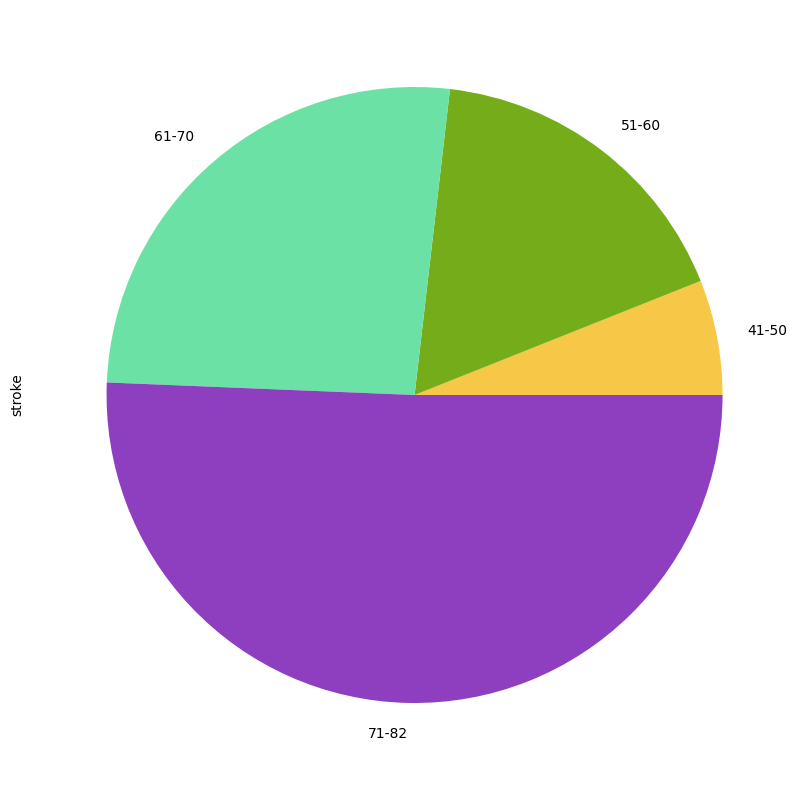

In [ ]:
check_pos(df_male)

<ipython-input-8-f990a0d6a6ae>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)
<ipython-input-8-f990a0d6a6ae>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_rates = data.groupby('age_group')['stroke'].mean()


-------------------
age_group
0.08-10    0.004525
11-20      0.003861
21-30      0.000000
31-40      0.014388
41-50      0.013333
51-60      0.055085
61-70      0.062500
71-82      0.175947
Name: stroke, dtype: float64
-------------------


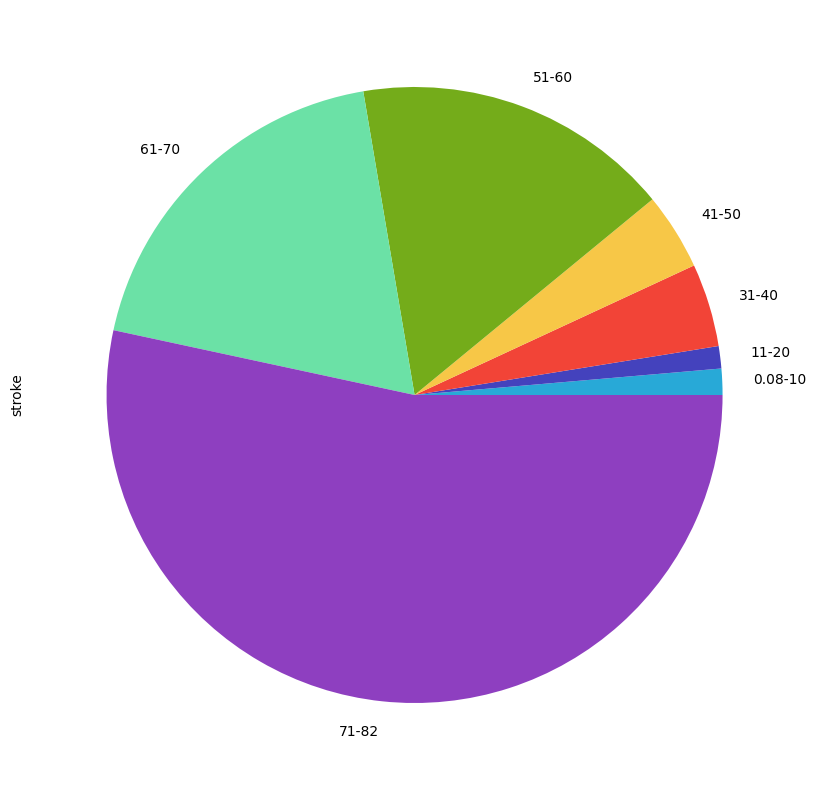

In [ ]:
check_pos(df_female)

# **A SIMPLE LINE GRAPH TO REPRESENT A VIZUALE TREND IN THE AGE GROUPS**


<ipython-input-11-dfabf5d52047>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_male_df = df_male.groupby('age_group')['stroke'].mean()


<Axes: xlabel='age_group'>

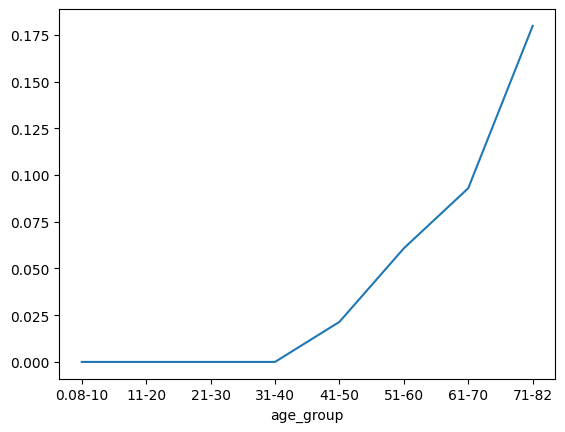

In [ ]:
stroke_male_df = df_male.groupby('age_group')['stroke'].mean()

stroke_male_df.plot.line()

<ipython-input-12-1bbc5200f321>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_female_df = df_female.groupby('age_group')['stroke'].mean()


<Axes: xlabel='age_group'>

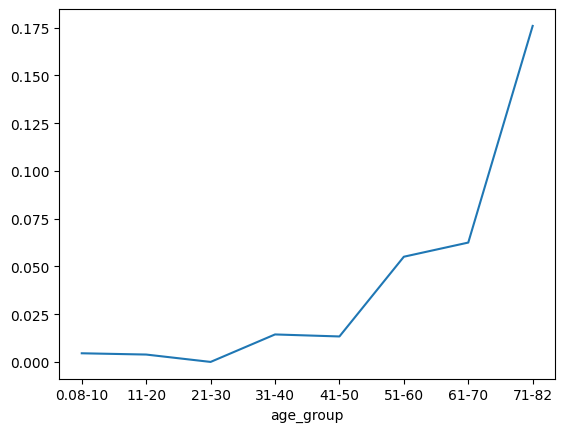

In [ ]:
stroke_female_df = df_female.groupby('age_group')['stroke'].mean()

stroke_female_df.plot.line()

<Axes: xlabel='age_group'>

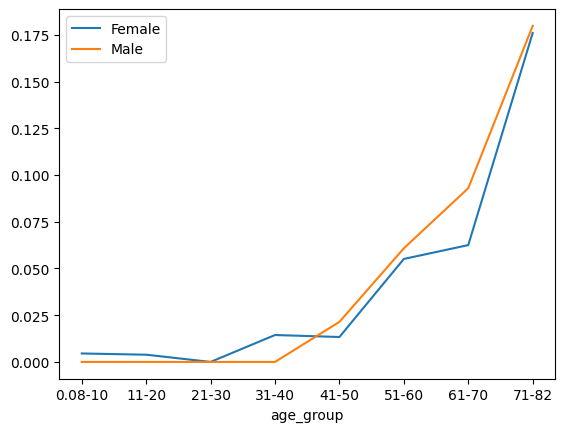

In [ ]:
stroke_rates_df = pd.DataFrame({
    'Female': stroke_female_df,
    'Male': stroke_male_df
})

stroke_rates_df.plot.line()